In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 26)                286       
                                                                 
Total params: 1,356
Trainable params: 1,356
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
58/65 [=========================>....] - ETA: 0s - loss: 3.2646 - accuracy: 0.0493
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 2s 14ms/step - loss: 3.2582 - accuracy: 0.0508 - val_loss: 3.1881 - val_accuracy: 0.0444
Epoch 2/1000
52/65 [=======================>......] - ETA: 0s - loss: 3.1459 - accuracy: 0.0607
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 3.1322 - accuracy: 0.0611 - val_loss: 3.0367 - val_accuracy: 0.0564
Epoch 3/1000
62/65 [===========================>..] - ETA: 0s - loss: 3.0062 - accuracy: 0.0882
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 3.0043 - accuracy: 0.0895 - val_loss: 2.8724 - val_accuracy: 0.1571
Epoch 4/1000
64/65 [============================>.] - ETA: 0s - loss: 2.8697 - accuracy: 0.1279


60/65 [==========================>...] - ETA: 0s - loss: 1.9207 - accuracy: 0.3447
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.9169 - accuracy: 0.3468 - val_loss: 1.4259 - val_accuracy: 0.6279
Epoch 29/1000
54/65 [=======================>......] - ETA: 0s - loss: 1.8911 - accuracy: 0.3466
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.8938 - accuracy: 0.3489 - val_loss: 1.3933 - val_accuracy: 0.6515
Epoch 30/1000
48/65 [=====================>........] - ETA: 0s - loss: 1.8765 - accuracy: 0.3582
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.8767 - accuracy: 0.3558 - val_loss: 1.3843 - val_accuracy: 0.6668
Epoch 31/1000
62/65 [===========================>..] - ETA: 0s - loss: 1.8719 - accuracy: 0.3561
Epoch 31

60/65 [==========================>...] - ETA: 0s - loss: 1.7373 - accuracy: 0.3954
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 5ms/step - loss: 1.7335 - accuracy: 0.3974 - val_loss: 1.1946 - val_accuracy: 0.7465
Epoch 56/1000
65/65 [==============================] - ETA: 0s - loss: 1.7294 - accuracy: 0.4045
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.7294 - accuracy: 0.4045 - val_loss: 1.2010 - val_accuracy: 0.7443
Epoch 57/1000
62/65 [===========================>..] - ETA: 0s - loss: 1.7072 - accuracy: 0.4115
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.7131 - accuracy: 0.4111 - val_loss: 1.2054 - val_accuracy: 0.7352
Epoch 58/1000
51/65 [======================>.......] - ETA: 0s - loss: 1.7112 - accuracy: 0.4190
Epoch 58

57/65 [=========================>....] - ETA: 0s - loss: 1.6306 - accuracy: 0.4357
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.6257 - accuracy: 0.4346 - val_loss: 1.1178 - val_accuracy: 0.7716
Epoch 83/1000
46/65 [====================>.........] - ETA: 0s - loss: 1.6302 - accuracy: 0.4358
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 4ms/step - loss: 1.6339 - accuracy: 0.4368 - val_loss: 1.1282 - val_accuracy: 0.7683
Epoch 84/1000
61/65 [===========================>..] - ETA: 0s - loss: 1.6108 - accuracy: 0.4468
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.6130 - accuracy: 0.4449 - val_loss: 1.1237 - val_accuracy: 0.7770
Epoch 85/1000
65/65 [==============================] - ETA: 0s - loss: 1.6204 - accuracy: 0.4426
Epoch 85

Epoch 109/1000
58/65 [=========================>....] - ETA: 0s - loss: 1.5758 - accuracy: 0.4648
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 1s 9ms/step - loss: 1.5747 - accuracy: 0.4650 - val_loss: 1.0767 - val_accuracy: 0.7919
Epoch 110/1000
54/65 [=======================>......] - ETA: 0s - loss: 1.5711 - accuracy: 0.4648
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.5730 - accuracy: 0.4615 - val_loss: 1.0853 - val_accuracy: 0.7857
Epoch 111/1000
61/65 [===========================>..] - ETA: 0s - loss: 1.5797 - accuracy: 0.4635
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 6ms/step - loss: 1.5770 - accuracy: 0.4644 - val_loss: 1.0874 - val_accuracy: 0.7661
Epoch 112/1000
62/65 [===========================>..] - ETA: 0s - loss: 1.5717 - accu

Epoch 136/1000
59/65 [==========================>...] - ETA: 0s - loss: 1.5401 - accuracy: 0.4698
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 1s 8ms/step - loss: 1.5403 - accuracy: 0.4706 - val_loss: 1.0637 - val_accuracy: 0.7796
Epoch 137/1000
59/65 [==========================>...] - ETA: 0s - loss: 1.5330 - accuracy: 0.4705
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 1s 10ms/step - loss: 1.5401 - accuracy: 0.4719 - val_loss: 1.0727 - val_accuracy: 0.7716
Epoch 138/1000
65/65 [==============================] - ETA: 0s - loss: 1.5399 - accuracy: 0.4747
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 1s 8ms/step - loss: 1.5399 - accuracy: 0.4747 - val_loss: 1.0749 - val_accuracy: 0.7781
Epoch 139/1000
54/65 [=======================>......] - ETA: 0s - loss: 1.5373 - acc

Epoch 163/1000
62/65 [===========================>..] - ETA: 0s - loss: 1.4913 - accuracy: 0.4923
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 4ms/step - loss: 1.4915 - accuracy: 0.4924 - val_loss: 1.0553 - val_accuracy: 0.7981
Epoch 164/1000
60/65 [==========================>...] - ETA: 0s - loss: 1.4943 - accuracy: 0.4902
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 4ms/step - loss: 1.4979 - accuracy: 0.4891 - val_loss: 1.0568 - val_accuracy: 0.7759
Epoch 165/1000
59/65 [==========================>...] - ETA: 0s - loss: 1.4899 - accuracy: 0.4906
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
65/65 [==============================] - 0s 4ms/step - loss: 1.4890 - accuracy: 0.4899 - val_loss: 1.0492 - val_accuracy: 0.7850
Epoch 165: early stopping


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

22/22 [==============================] - 0s 2ms/step - loss: 1.0492 - accuracy: 0.7850


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 120ms/step
[5.3078951e-05 3.6930509e-02 5.7198715e-01 1.4788117e-06 2.1519223e-02
 2.3558958e-02 6.7494391e-14 1.4958308e-12 1.8904832e-03 1.4428479e-04
 3.9097273e-10 1.8164956e-08 3.2445056e-05 5.9910491e-08 3.4083197e-01
 5.5710708e-15 1.1918448e-06 7.8558014e-06 3.0387077e-03 2.8862113e-08
 3.0743490e-08 1.7696450e-22 2.4510732e-06 4.6031031e-22 9.6904986e-22
 1.3603119e-21]
2


# Confusion matrix

86/86 [==============================] - 0s 2ms/step


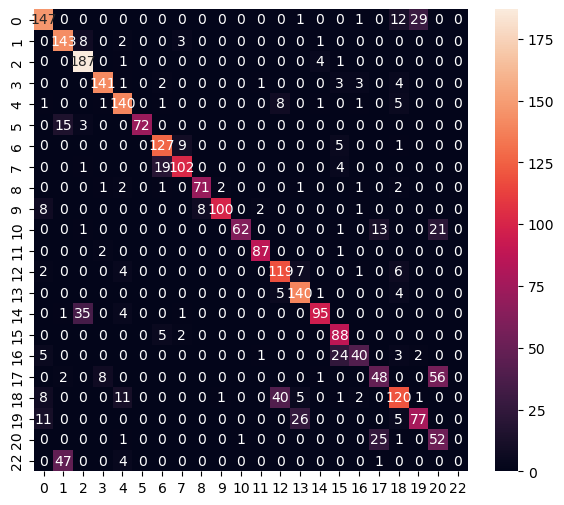

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       190
           1       0.69      0.91      0.78       157
           2       0.80      0.97      0.87       193
           3       0.92      0.91      0.92       155
           4       0.82      0.89      0.85       158
           5       1.00      0.80      0.89        90
           6       0.82      0.89      0.86       142
           7       0.87      0.81      0.84       126
           8       0.90      0.88      0.89        81
           9       0.97      0.84      0.90       119
          10       0.98      0.63      0.77        98
          11       0.96      0.97      0.96        90
          12       0.69      0.86      0.77       139
          13       0.78      0.93      0.85       150
          14       0.92      0.70      0.79       136
          15       0.69      0.93      0.79        95
          16       0.80      0.53      0.64        75
     

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp3kn0miow\assets


INFO:tensorflow:Assets written to: C:\Users\acer\AppData\Local\Temp\tmp3kn0miow\assets


7512

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 4.46 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.3079017e-05 3.6930572e-02 5.7198673e-01 1.4788162e-06 2.1519246e-02
 2.3558976e-02 6.7494729e-14 1.4958355e-12 1.8904861e-03 1.4428495e-04
 3.9097398e-10 1.8165045e-08 3.2445092e-05 5.9910676e-08 3.4083232e-01
 5.5710886e-15 1.1918462e-06 7.8558251e-06 3.0387128e-03 2.8862143e-08
 3.0743642e-08 1.7696507e-22 2.4510759e-06 4.6031344e-22 9.6905289e-22
 1.3603109e-21]
2
